---

# Описание проекта

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
Вам предстоит изучить:
как клиенты пользуются сервисом,
когда делают первые покупки на сайте,
сколько денег приносит компании каждый клиент,
когда расходы на привлечение клиента окупаются.
Выручка измеряется в условных единицах — у.е.

## Шаг. Загрузите данные и подготовьте их к анализу

In [1]:
# Импорт библиотек
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

 ### Положите данные о визитах, заказах и рекламных расходах в переменные

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

### Подготовьте данные. Убедитесь, что тип данных во всех колонках соответствует сохранённым в них значениям.

In [3]:
df_list = [visits, orders, costs]
for df in df_list:
  display(df.head())
  df.info()
  display(df.isna().sum())
  display(df.describe())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Buy Ts     0
Revenue    0
Uid        0
dtype: int64

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


source_id    0
dt           0
costs        0
dtype: int64

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [4]:
for df in df_list:
  df.columns=[col.lower().replace(' ','_') for col in df.columns]

In [5]:
for df in df_list:
  display(df.head())

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


В таблице с информацией о визитах необходимо сменить тип даты начала и окончания сессии на соответсвующий. В таблицах с информацией о заказах и расходах на маркетинг также необходимо поменять тип данных у дат.
Пропуски отсутствуют.

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


---

## Шаг. Рассчитайте метрики и постройте графики

### Продуктовые метрики

#### Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;

In [10]:
visits['session_year'] = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [11]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print("Среднее количество уникальных пользователей в день -", int(dau_total))
print("Среднее количество уникальных пользователей в неделю -", int(wau_total))
print("Среднее количество уникальных пользователей в месяц -", int(mau_total))

Среднее количество уникальных пользователей в день - 907
Среднее количество уникальных пользователей в неделю - 5621
Среднее количество уникальных пользователей в месяц - 23228


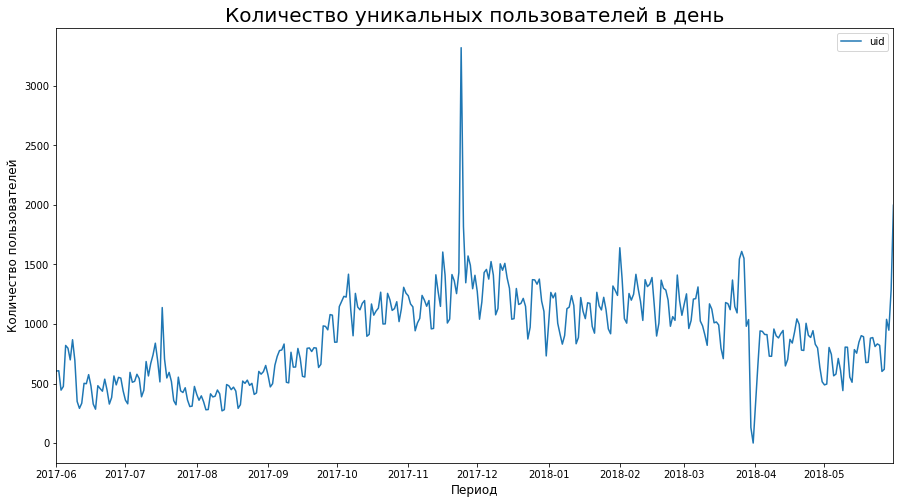

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
visits.groupby('session_date').agg({'uid': 'nunique'}).plot(ax=ax)
plt.title('Количество уникальных пользователей в день', size=20)
plt.xlabel('Период', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

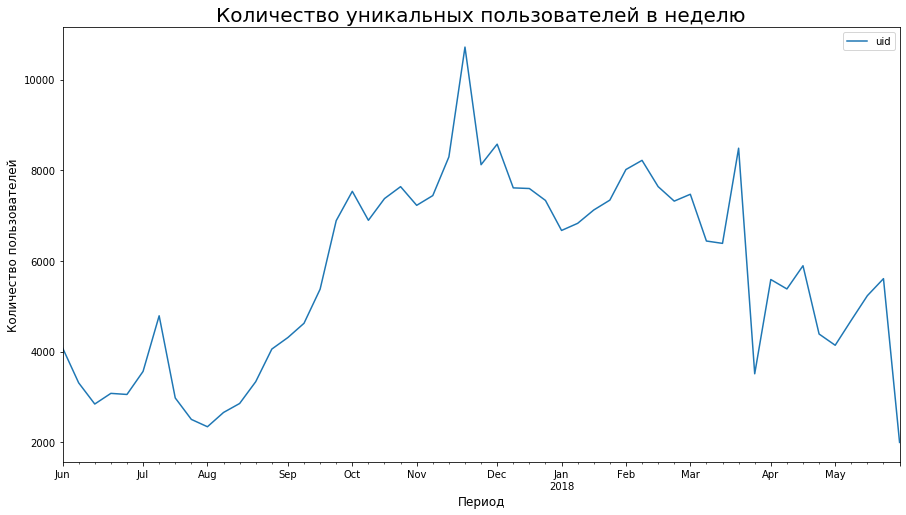

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
visits.groupby(['session_week']).agg({'uid': 'nunique'}).plot(ax=ax)
plt.title('Количество уникальных пользователей в неделю', size=20)
plt.xlabel('Период', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

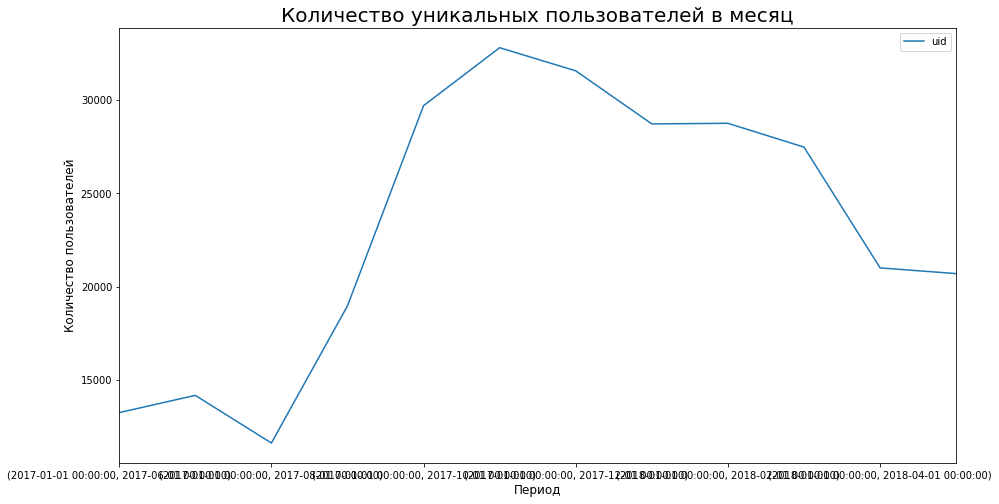

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'}).plot(ax=ax)
plt.title('Количество уникальных пользователей в месяц', size=20)
plt.xlabel('Период', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

Среднее количество посетителей в день составляет примерно 907 визитов, 5621 в неделю и 23228 в месяц. По графику видно что было несколько дней скачков, когда посетителей было в разы больше (как с одной, так и с другой платформы) и 2 дня когда количество визитов со всех платформ резко упало до нуля. Резкое падение количества посетителей до нуля скорее всего связано с техническими неполадками. Резкий скачок количества посетителей, возможно связан с ожиданием какой-либо премьеры. Также по графику видно, что основной пик визитов приходится на середину ноября (когда люди начинают готовится к Новому году и выходит большинство премьер), также наблюдает еще один пик в середине марта и снижение числа посетителей в конце марта. Количество пользователей в летние месяцы сильно снижается, наименьшее количество посетителей с июня по август (время отпусков и летних каникул). Начиная с сентября, число посетителей резко возрастает и держится высоким до января, при этом число посетителей с платформы touch держится примерно на одном уровне с октября по март.

#### Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени;

In [15]:
sessions_mean = visits.groupby('session_date').agg({'uid': 'count'}).mean()
print(f'{int(sessions_mean)}', "сессий в день")

987 сессий в день


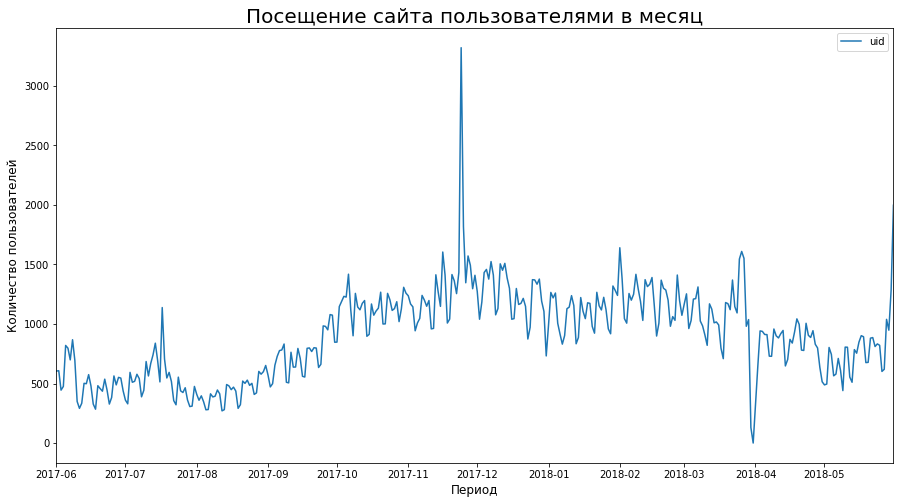

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
visits.groupby('session_date').agg({'uid': 'nunique'}).plot(ax=ax)
plt.title('Посещение сайта пользователями в месяц', size=20)
plt.xlabel('Период', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

Среднее количество сессий 987 в день. Также наблюдается сезонность - резкий подъем перед новогодними праздниками, спад в марте- апреле и неполадки работы сайта, когда посетителей не было совсем.

#### Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно;

In [17]:
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print(sessions_per_user) 

                            n_sessions  n_users  sess_per_user
session_year session_month                                    
2017-01-01   2017-06-01          16505    13259       1.244815
             2017-07-01          17828    14183       1.256998
             2017-08-01          14355    11631       1.234202
             2017-09-01          23907    18975       1.259921
             2017-10-01          37903    29692       1.276539
             2017-11-01          43969    32797       1.340641
             2017-12-01          41983    31557       1.330386
2018-01-01   2018-01-01          36939    28716       1.286356
             2018-02-01          37182    28749       1.293332
             2018-03-01          35679    27473       1.298693
             2018-04-01          26515    21008       1.262138
             2018-05-01          26635    20701       1.286653


In [18]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print("Средняя продолжительность пользовательской сессии -", visits['session_duration_sec'].mean(), "секунд") 

Средняя продолжительность пользовательской сессии - 643.506488592098 секунд


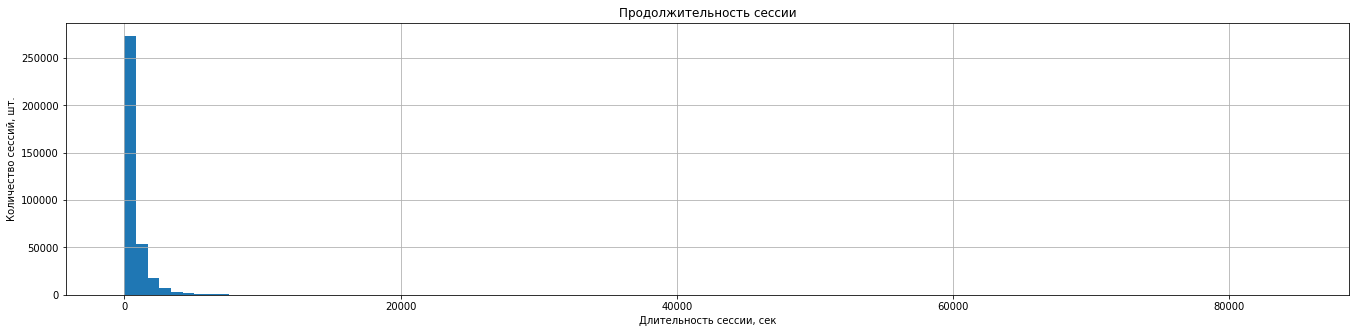

In [19]:
visits['session_duration_sec'].hist(bins=100, figsize=(23,5))
plt.title('Продолжительность сессии')
plt.xlabel('Длительность сессии, сек')
plt.ylabel('Количество сессий, шт.');

Распределение не похоже на нормальное. Рассчитаем моду.


In [20]:
print(visits['session_duration_sec'].mode()) 

0    60
dtype: int64


Наиболее часто встречающаяся продолжительность сессии получилась 60 секунд. 

#### Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.

Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность в мобильном приложении.

In [21]:
visits.head(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,2018-01-01,2018-01-25,2018-01-30,3360
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-01-01,2017-11-01,2017-11-02,2017-11-05,60
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-01-01,2017-07-01,2017-07-13,2017-07-19,180
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-01-01,2017-11-01,2017-11-02,2017-11-08,60


In [22]:
first_visits = visits.groupby(['uid'])['start_ts'].min()
first_visits.name = 'first_visits'
visits = visits.join(first_visits,on='uid') 
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visits
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00


In [23]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
device                  359400 non-null object
end_ts                  359400 non-null datetime64[ns]
source_id               359400 non-null int64
start_ts                359400 non-null datetime64[ns]
uid                     359400 non-null uint64
session_year            359400 non-null datetime64[ns]
session_month           359400 non-null datetime64[ns]
session_week            359400 non-null datetime64[ns]
session_date            359400 non-null object
session_duration_sec    359400 non-null int64
first_visits            359400 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(2), object(2), uint64(1)
memory usage: 30.2+ MB


In [24]:
#visits['first_visits'] = visits['first_visits'].astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visits
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00


Получим день начала месяца, за который произошло событие. Он станет идентификатором месяца. Параметр unit метода pd.to_timedelta задаёт единицу измерения — в нашем случае дня: unit='d'. Вычтем из даты порядковый номер дня:

In [25]:
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_visits'].astype('datetime64[M]')

Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты:

In [26]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')


Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый месяц жизни»:

In [27]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждую следующую неделю. Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:

In [28]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]

Переименуем столбец uid в cohort_users - параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое:

In [29]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Объединим данные по когортам с исходным количеством пользователей в когорте:

In [30]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

In [31]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


Построим сводную таблицу и создадим тепловую карту:

In [32]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

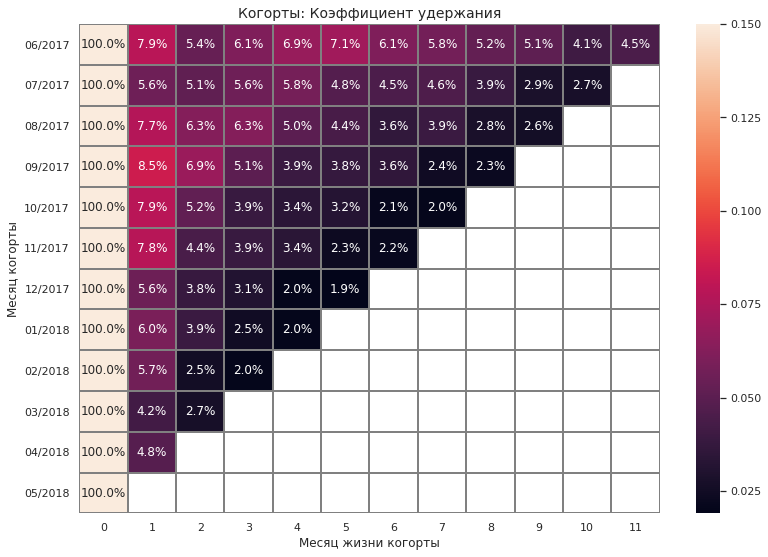

In [33]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: Коэффициент удержания', size=14)
ax =sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.15)
ax.set_ylabel('Месяц когорты')
ax.set_xlabel('Месяц жизни когорты')
plt.show()

Низкий показатель Retention Rate (далее RR) вызван спецификой сервиса - люди эпизодически посещают какие-либо. При этом самый высокий показатель RR у когорты 06/2017 - 4,5 % на 11 неделе.

Среднее количество посетителей в день составляет примерно 907 визитов, 5621 в неделю и 23228 в месяц. По графику видно что было несколько дней скачков, когда посетителей было в разы больше (как с одной, так и с другой платформы) и 2 дня когда количество визитов со всех платформ резко упало до нуля. Резкое падение количества посетителей до нуля скорее всего связано с техническими неполадками. Резкий скачок количества посетителей, возможно связан с ожиданием какой-либо премьеры. Также по графику видно, что основной пик визитов приходится на середину ноября (когда люди начинают готовится к Новому году и выходит большинство премьер), также наблюдает еще один пик в середине марта и снижение числа посетителей в конце марта. Количество пользователей в летние месяцы сильно снижается, наименьшее количество посетителей с июня по август (время отпусков и летних каникул). Начиная с сентября, число посетителей резко возрастает и держится высоким до января, при этом число посетителей с платформы touch держится примерно на одном уровне с октября по март. Среднее количество сессий 987 в день. Также наблюдается сезонность - резкий подъем перед новогодними праздниками, спад в марте- апреле и неполадки работы сайта, когда посетителей не было совсем. Средняя продолжительность пользовательской сессии - 643 секунды. Наиболее часто встречающаяся продолжительность сессии получилась 60 секунд. Низкий показатель Retention Rate (далее RR) вызван спецификой сервиса - люди эпизодически посещают какие-либо. При этом самый высокий показатель RR у когорты 06/2017 - 4,5 % на 11 неделе.

### Метрики электронной коммерции

#### Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;

Получим данные по времени с момента от первого посещения пользователем сайта до совершения им первой покупки и построим распределение.

In [34]:
first_ts_dates = visits.groupby('uid')['start_ts'].min()
first_ts_dates.name = 'first_ts_datetime'
first_ts_dates.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_ts_datetime, dtype: datetime64[ns]

In [35]:
# Добавим информацию о первых визитах пользователей в таблицу с заказами

orders = orders.merge(first_ts_dates, on='uid')
orders.head()

,buy_ts,revenue,uid,first_ts_datetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


Посчитаем сколько секунд прошло от момента первой сессии пользователя до покупки

In [36]:
orders['start_to_buy_sec'] = (orders['buy_ts'] - orders['first_ts_datetime']).dt.seconds
orders.head()

,buy_ts,revenue,uid,first_ts_datetime,start_to_buy_sec
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,900
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,1620


Посмотрим на распределение

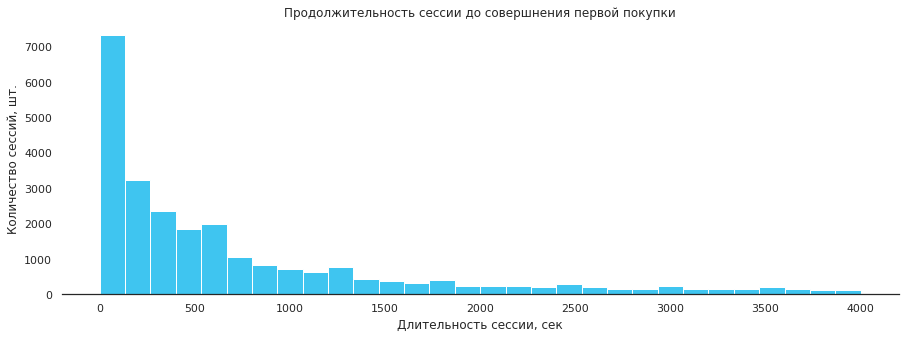

In [37]:
plt.figure(figsize=(15, 5))
orders['start_to_buy_sec'].hist(bins=30, range=(0,4000), grid=False, color='#3fc5f0')
sns.despine(left=True)
plt.title('Продолжительность сессии до совершнения первой покупки')
plt.xlabel('Длительность сессии, сек')
plt.ylabel('Количество сессий, шт.');


Отмечаем ненормальное распределение, поэтому рассчитаем моду (значение в выборке, которое встречается чаще всего):

In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 5 columns):
buy_ts               50415 non-null datetime64[ns]
revenue              50415 non-null float64
uid                  50415 non-null uint64
first_ts_datetime    50415 non-null datetime64[ns]
start_to_buy_sec     50415 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(1), uint64(1)
memory usage: 2.3 MB


In [39]:
print(orders['start_to_buy_sec'].mode()) 

0    60
dtype: int64


Большая часть покупателей заходит на сайт для того чтобы оформить заказ.

Большая часть значений распределяется в промежутке от 0 до 500 секунд, то есть большей части пользователей нужно менее 10 мин, чтобы совершить покупку. При этом есть доля пользователей, которым на принятие решения необходимы сутки.

#### Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

Сгруппируем данные по пользователям, за какое время и сколько покупок было совершено

In [40]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders_per_month = orders.groupby('order_month').agg({'revenue': 'count'}).rename(columns={'revenue':'n_purchases'})
orders_per_month


,n_purchases
order_month,
2017-06-01,2354
2017-07-01,2363
2017-08-01,1807
2017-09-01,3387
2017-10-01,5679
2017-11-01,5659
2017-12-01,6218
2018-01-01,4721
2018-02-01,5281


Удалим 1 покупку из июня 2018 года, т.к. она явно попала в выборку ошибочно и построим график.

In [41]:

orders_per_month.drop(orders_per_month[orders_per_month['n_purchases']==1].index, inplace=True)
orders_per_month=orders_per_month.reset_index()

In [42]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [43]:

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340



Объединим количество покупок с количеством покупателей:

In [44]:
orders_per_month=pd.merge(orders_per_month, cohort_sizes, left_on='order_month', right_on='first_order_month')
orders_per_month['revenue_per_buyer']=orders_per_month['n_purchases']/orders_per_month['n_buyers']

In [45]:
orders_per_month['revenue_per_buyer'].mean()
f"В среднем за 1 месяц покупают - {round(orders_per_month['revenue_per_buyer'].mean(),2)} раза"

'В среднем за 1 месяц покупают - 1.37 раза'

#### Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;

In [46]:
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,first_ts_datetime,start_to_buy_sec,order_month,orders_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,900,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,1620,2017-06-01,2017-06-01


               revenue
orders_month          
2017-06-01    4.060106
2017-07-01    5.306589
2017-08-01    4.847139
2017-09-01    5.416448
2017-10-01    4.928280
2017-11-01    4.783518
2017-12-01    5.852139
2018-01-01    4.112927
2018-02-01    4.840095
2018-03-01    5.413930
2018-04-01    5.150645
2018-05-01    4.771279
2018-06-01    3.420000
count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64
device    desktop      touch
count   13.000000  12.000000
mean     8.098211  10.010015
std      2.895514   5.093983
min      3.420000   5.722232
25%      6.280565   6.442263
50%      7.348529   7.994518
75%      9.527496  12.032577
max     14.742187  22.168271


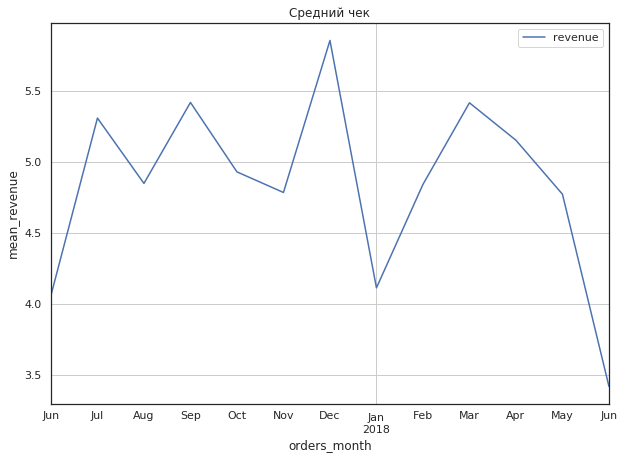

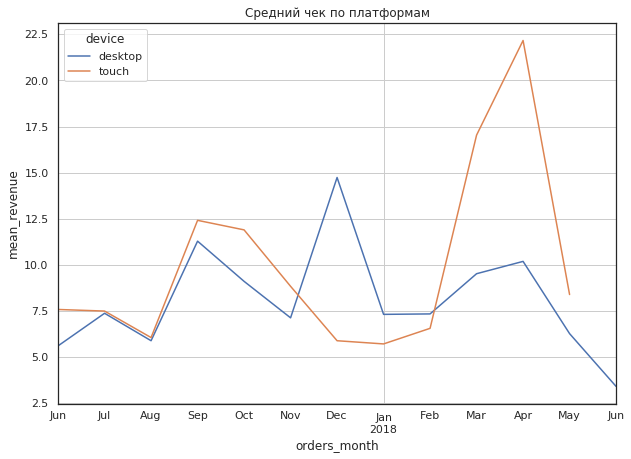

In [47]:
mean_chek_month = orders.groupby('orders_month').agg({'revenue':'mean'})
print(mean_chek_month)
mean_chek_month.plot(kind = 'line', 
                        grid=True, 
                        figsize=(10, 7))
plt.title("Средний чек")
plt.xlabel("orders_month")
plt.ylabel("mean_revenue")

print(orders['revenue'].describe())
orders_by_platform = visits.merge(orders, on='uid')
                                                    
mean_check_by_platform = orders_by_platform.pivot_table(index='orders_month',
                                                            columns='device',
                                                            values='revenue',
                                                            aggfunc='mean')
mean_check_by_platform.plot(kind = 'line', 
                        grid=True, 
                        figsize=(10, 7))
plt.title("Средний чек по платформам")
plt.xlabel("orders_month")
plt.ylabel("mean_revenue")
print(mean_check_by_platform.describe())

Средний чек в месяц равен 4.999647 у.е. Средний чек вырстает в декабре. Скорее всего это связано с новогодними каникулами. И резко падает в январе, когда такие мероприятия становятся уже не инетересны. Что касается среднего чека по платформам, то средний чек с платформы touch выше на 25%, чем средний чек с платформы desctop. В декабре покупку чаще всего совершают через desktop, а с с февраля по май 2018 через платформу touch.

#### Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

  first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58
  first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58
age                      0        1        2        3        4        5   \
first_order_month                                                          
2017-06-01         4.724414  5.20974  5.64738  6.60205  7.62458  8.36008   
2017-07-01         6.010218  6.34543  6.96896  7.32794  7.50473  7.66077   
2017-08-01         5.276518  5.74851  6.20699  6.59827  7.09232  7.37586   
2017-09-01         5.644529  6.76212  7.28305  11.2588  11.6594  12.

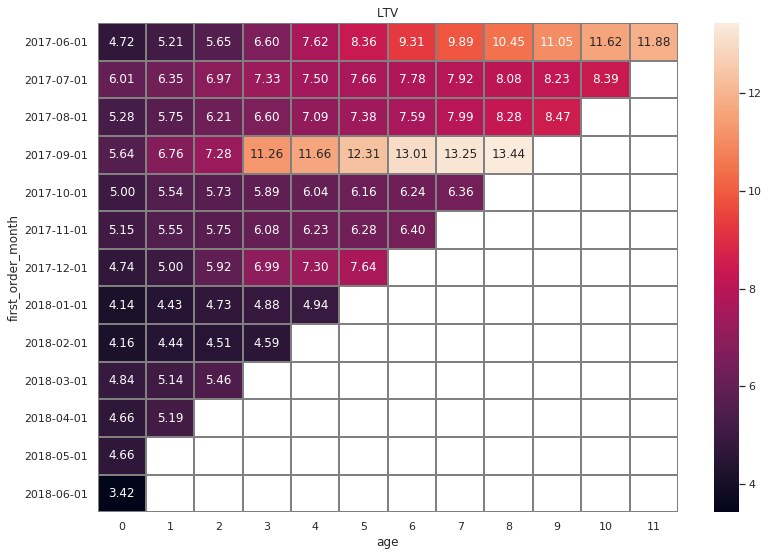

In [48]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

new_buyers_count = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
new_buyers_count.columns = ['first_order_month', 'n_buyers']

orders_new = pd.merge(orders,first_orders, on='uid')

cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
print(cohorts.head())

report = pd.merge(new_buyers_count, cohorts, on='first_order_month')
print(report.head())

report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_buyers']

report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m-%d')    
pivot_report = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)

print(pivot_report.fillna(''))

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(pivot_report, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray')
print(report['ltv'].mean())

Наибольшую прибыль приносят клиенты, подписавшиеся в июне и сентябре. В среднем один покупатель приносит 12% дополнительной прибыли.

Большая часть значений распределяется в промежутке от 0 до 500 секунд, то есть большей части пользователей нужно менее 10 мин, чтобы совершить покупку. При этом есть доля пользователей, которым на принятие решения необходимы сутки. Средний чек в месяц равен 4.999647 у.е. Средний чек вырстает в декабре. Скорее всего это связано с новогодними каникулами. И резко падает в январе, когда такие мероприятия становятся уже не инетересны. Что касается среднего чека по платформам, то средний чек с платформы touch выше на 25%, чем средний чек с платформы desctop. В декабре покупку чаще всего совершают через desktop, а с с февраля по май 2018 через платформу touch. Наибольшую прибыль приносят клиенты, подписавшиеся в июне и сентябре. В среднем один покупатель приносит 12% дополнительной прибыли.

### Маркетинговые метрики

#### Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени;

In [49]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [50]:
print("Общая сумма расходов на маркетинг", costs['costs'].sum())

Общая сумма расходов на маркетинг 329131.62


In [51]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [52]:
costs_source = costs.groupby('source_id').agg({'costs': 'sum'})
costs_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [53]:
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


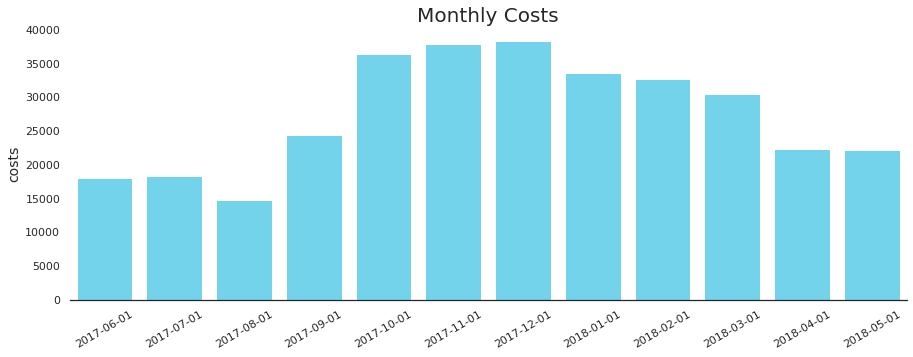

In [54]:
#monthly_costs.plot(grid=True)
monthly_costs['month_x'] = monthly_costs['month'].astype('str')

plt.figure(figsize=(15, 5))
plt.title('Monthly Costs', fontsize=20)
sns.barplot(x='month_x', y='costs', data=monthly_costs, color="#5edfff", label="line")
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('costs', fontsize=14)
plt.xticks(rotation=30)

plt.show()

По графику видно, что расходы на маркетинг коррелируют с тем, сколько покупают за период.

Наиболее дорогой канал привлечения клиентов, источник №3. Расходы на все источники, возрастают с сентября по ноябрь.

#### Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках;

Чтобы найти стоимость привлечения покупателя из каждого источника, необходимо получить таблицу, содержащую информацию о первом заказе каждого пользователя и посчитать количество uid совершивших покупку.

In [55]:
uid_source = visits.sort_values('start_ts').groupby('uid').first().reset_index()
uid_source = uid_source[['uid','source_id']]

In [56]:
orders_w_source = orders.merge(uid_source, on = 'uid', how = 'left')

In [57]:
orders_w_source.head()

,buy_ts,revenue,uid,first_ts_datetime,start_to_buy_sec,order_month,orders_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,900,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,1620,2017-06-01,2017-06-01,3


In [58]:
buy_date = orders_w_source.groupby('uid')['buy_ts'].min().reset_index()
buy_date.columns = ['uid','min_buy_date']

In [59]:
orders_w_source = orders_w_source.merge(buy_date, on = 'uid',how = 'left')
orders_w_source.head()

,buy_ts,revenue,uid,first_ts_datetime,start_to_buy_sec,order_month,orders_month,source_id,min_buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,2017-06-01,2017-06-01,1,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,2017-06-01,2017-06-01,2,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2017-06-01,2017-06-01,2,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,900,2017-06-01,2017-06-01,2,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,1620,2017-06-01,2017-06-01,3,2017-06-01 07:58:00


In [60]:
orders_w_source = orders_w_source.query('buy_ts == min_buy_date')

In [61]:
orders_w_source['buy_date'] = orders_w_source['buy_ts'].astype('datetime64[D]')

In [62]:
buyers_in_day = orders_w_source.groupby(['source_id','buy_date'])['uid'].count().reset_index()
buyers_in_day.columns = ['source_id','dt','n_buyers']

In [63]:
costs_new = costs.merge(buyers_in_day, on =['source_id','dt'], how = 'inner')

In [64]:
costs_new['month'] = costs_new['dt'].astype('datetime64[M]')

In [65]:
for_cac = costs_new.groupby(['source_id','month'])['costs','n_buyers'].sum().reset_index()

In [66]:
for_cac['cac'] = for_cac['costs'] / for_cac['n_buyers']
for_cac

,source_id,month,costs,n_buyers,cac
0,1,2017-06-01,1103.93,190,5.810158
1,1,2017-07-01,1072.88,160,6.705500
2,1,2017-08-01,925.63,113,8.191416
3,1,2017-09-01,1502.01,227,6.616784
4,1,2017-10-01,2315.75,340,6.811029
...,...,...,...,...,...
79,10,2018-01-01,568.58,92,6.180217
80,10,2018-02-01,480.88,123,3.909593
81,10,2018-03-01,526.41,186,2.830161
82,10,2018-04-01,344.72,107,3.221682


In [67]:
cac = for_cac.groupby('source_id')['costs','n_buyers'].sum().reset_index()
cac

,source_id,costs,n_buyers
0,1,20785.41,2899
1,2,42777.37,3506
2,3,141321.63,10473
3,4,61057.91,10295
4,5,51756.40,6931
5,9,4775.16,1088
6,10,5351.94,1329


In [68]:
cac['cac'] = cac['costs'] / cac['n_buyers']
cac

,source_id,costs,n_buyers,cac
0,1,20785.41,2899,7.169855
1,2,42777.37,3506,12.201189
2,3,141321.63,10473,13.493901
3,4,61057.91,10295,5.930831
4,5,51756.40,6931,7.467378
5,9,4775.16,1088,4.388934
6,10,5351.94,1329,4.027043


In [69]:
cac_total = cac['costs'].sum() / cac['n_buyers'].sum()
cac_total

8.976364831193013

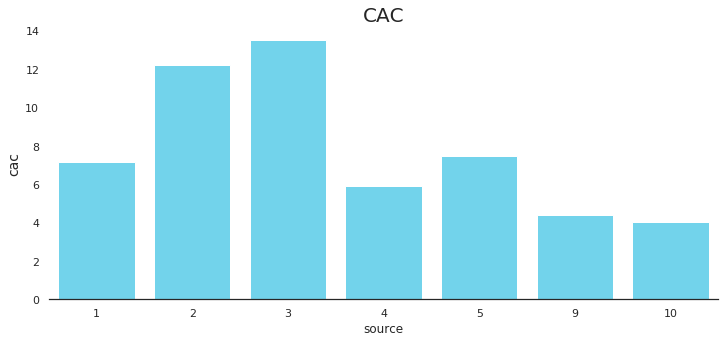

In [70]:
plt.figure(figsize=(12, 5))
plt.title('CAC', fontsize=20)
sns.barplot(x='source_id', y='cac', data=cac, color="#5edfff", label="line")
sns.despine(left=True)
plt.xlabel('source')
plt.ylabel('cac', fontsize=14)

plt.show()

In [71]:

cac_pivot = for_cac.pivot(index = 'month', columns = 'source_id', values = 'cac')
cac_pivot

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,5.810158,10.329277,12.118574,8.510412,6.812813,3.562941,2.981579
2017-07-01,6.705500,11.216875,14.989004,6.827331,7.087801,3.808846,4.731569
2017-08-01,8.191416,14.490894,18.230089,9.518817,6.070222,3.645902,4.611892
2017-09-01,6.616784,13.509774,12.757426,8.800441,6.535042,4.102069,5.026395
2017-10-01,6.811029,12.234848,13.660799,5.478532,6.103069,4.558571,2.786411
2017-11-01,7.546790,13.185126,14.001102,4.578437,9.127475,4.380138,6.151797
2017-12-01,7.073112,12.855118,12.315505,5.577683,7.616757,4.962727,6.514706
2018-01-01,9.185630,14.238836,14.720457,5.651928,8.485814,6.522875,6.180217
2018-02-01,8.016291,15.270785,13.029817,5.164521,7.479808,5.549405,3.909593


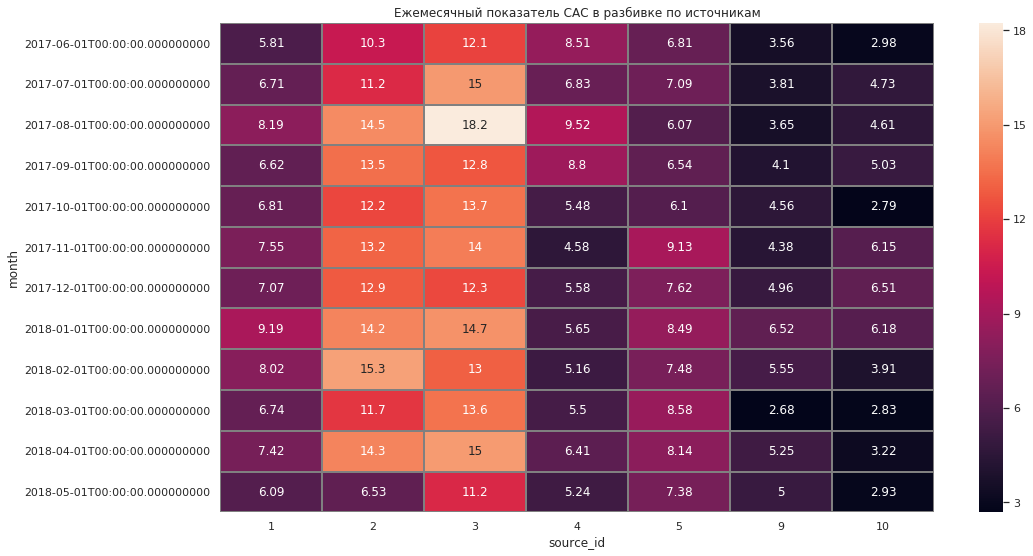

In [72]:
plt.figure(figsize=(16, 9))
plt.title('Ежемесячный показатель CAC в разбивке по источникам')
sns.heatmap(cac_pivot , annot=True, linewidths=1, fmt='.3g',linecolor='gray')

ax.set_ylabel('Месяц')
ax.set_xlabel('Источник рекламы')
plt.show()


Видно, что дороже всего по стоимости привлечения покупателей обходится третий канал. Наиболее выгодным по этому показателю можно считать четвертый канал, от него пришло большее количество покупателей, а затраты на маркетинг были в два раза меньше. Также стоит отметить первый канал, у него низкая стоимость привлечения покупателей, при сравнительно небольших затратах.

#### Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

Сначала расчитаю время окупаемости когорт (ROMI)

In [73]:

orders_for_roi = orders_w_source.groupby(['source_id','buy_date']).agg({'uid':'count', 'revenue':'sum'}).reset_index()
orders_for_roi

,source_id,buy_date,uid,revenue
0,1,2017-06-01,14,163.31
1,1,2017-06-02,7,48.22
2,1,2017-06-03,7,16.83
3,1,2017-06-04,3,7.39
4,1,2017-06-05,18,64.31
...,...,...,...,...
2430,10,2018-05-27,2,1.47
2431,10,2018-05-28,10,11.55
2432,10,2018-05-29,7,12.91
2433,10,2018-05-30,5,7.57


In [74]:
costs_for_roi = costs_new.groupby(['month']).agg({'costs':'sum', 'n_buyers':'sum'}).reset_index()
costs_for_roi['cac']=costs_for_roi['costs']/costs_for_roi['n_buyers']
cac_for_roi = costs_for_roi[['month','cac','costs']]
cac_for_roi.columns = ['first_order_month','cac','costs']

In [75]:
cac_for_roi

,first_order_month,cac,costs
0,2017-06-01,8.857840,17919.41
1,2017-07-01,9.385127,18047.60
2,2017-08-01,10.699218,14647.23
3,2017-09-01,9.407892,24281.77
4,2017-10-01,8.350915,36242.97
5,2017-11-01,9.275886,37854.89
6,2017-12-01,8.707677,38165.75
7,2018-01-01,9.916223,33447.42
8,2018-02-01,8.939381,32637.68
9,2018-03-01,8.590648,30350.76


In [76]:
report['first_order_month'] = report['first_order_month'].astype('datetime64[M]')

In [77]:

roi = report.merge(cac_for_roi, on = 'first_order_month', how = 'left')

In [78]:
roi

,first_order_month,n_buyers,order_month,revenue,age,ltv,cac,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,8.857840,17919.41
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,8.857840,17919.41
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,8.857840,17919.41
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,8.857840,17919.41
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,8.857840,17919.41
...,...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,8.590648,30350.76
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,9.709130,22097.98
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,9.709130,22097.98
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562,7.407082,22132.36


In [79]:
roi['romi'] = roi['ltv'] / roi['cac']
roi

,first_order_month,n_buyers,order_month,revenue,age,ltv,cac,costs,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,8.857840,17919.41,0.533360
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,8.857840,17919.41,0.054791
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,8.857840,17919.41,0.049407
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,8.857840,17919.41,0.107777
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,8.857840,17919.41,0.115438
...,...,...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,8.590648,30350.76,0.036733
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,9.709130,22097.98,0.479713
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,9.709130,22097.98,0.054753
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562,7.407082,22132.36,0.629204


In [80]:

romi_pivot = (
    roi.pivot_table(
        index='first_order_month',
        columns = 'age', 
        values = 'romi').cumsum(axis=1)
)

1.1496394920238058


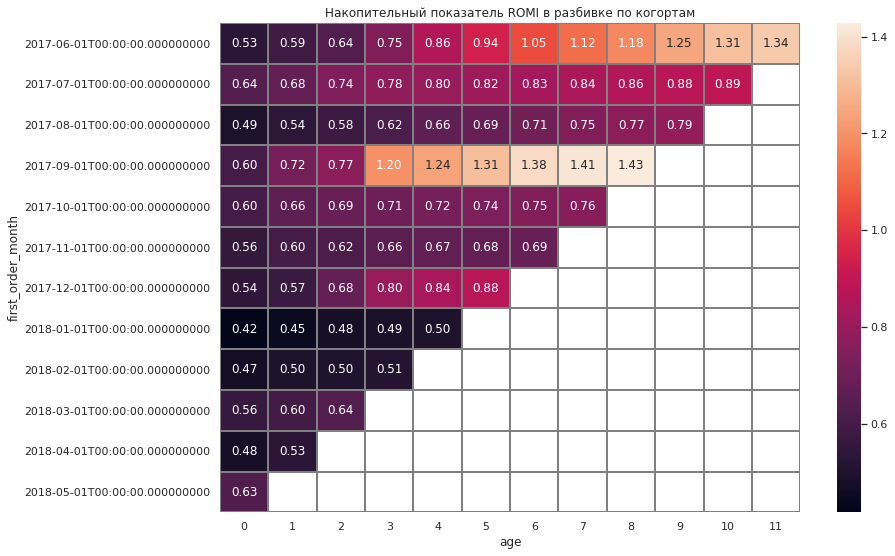

In [81]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Накопительный показатель ROMI в разбивке по когортам')
sns.heatmap(romi_pivot, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray')
print(report['ltv'].mean())

In [82]:

romi_pivot.mean(axis=0)

age
0     0.543349
1     0.584740
2     0.633861
3     0.723074
4     0.786729
5     0.864233
6     0.901529
7     0.975604
8     1.060726
9     0.972154
10    1.102867
11    1.341098
dtype: float64

Вывод:

Окупились только 2 когорты (июня и сентябрь)
Расчитаю показатель ROMI в разбивке по месяцам и источникам

In [83]:
orders_w_source2 = orders.merge(uid_source, on ='uid',how = 'left')


In [84]:
orders_w_source2['buy_month'] = orders_w_source2['buy_ts'].astype('datetime64[M]')

In [85]:
first_buy_month2 = orders_w_source2.groupby('uid').agg({'buy_month': 'min'}).reset_index()
first_buy_month2.columns = ['uid', 'first_order_month']
orders_w_source2 = orders_w_source2.merge(first_buy_month2,on = 'uid',how = 'left')

In [86]:
ltv2 = orders_w_source2.groupby(['first_order_month','buy_month','source_id']).agg({'revenue': 'sum', 'uid':'count'}).reset_index()

In [87]:
costs['first_order_month'] = costs['dt'].astype('datetime64[M]')
costs_for_merge = costs.groupby(['source_id','first_order_month'])['costs'].sum().reset_index()

In [88]:
romi_final = ltv2.merge(costs_for_merge, on =['source_id','first_order_month'], how = 'left')

In [89]:
romi_final['ltv'] = romi_final['revenue']/romi_final['uid']
romi_final['cac'] = romi_final['costs']/romi_final['uid']
romi_final['romi'] = romi_final['ltv']/romi_final['cac']

In [90]:
romi_pivot = (
    romi_final.pivot_table(
        index = 'first_order_month',
        columns = 'source_id',
        values = 'romi').cumsum(axis=0)
)

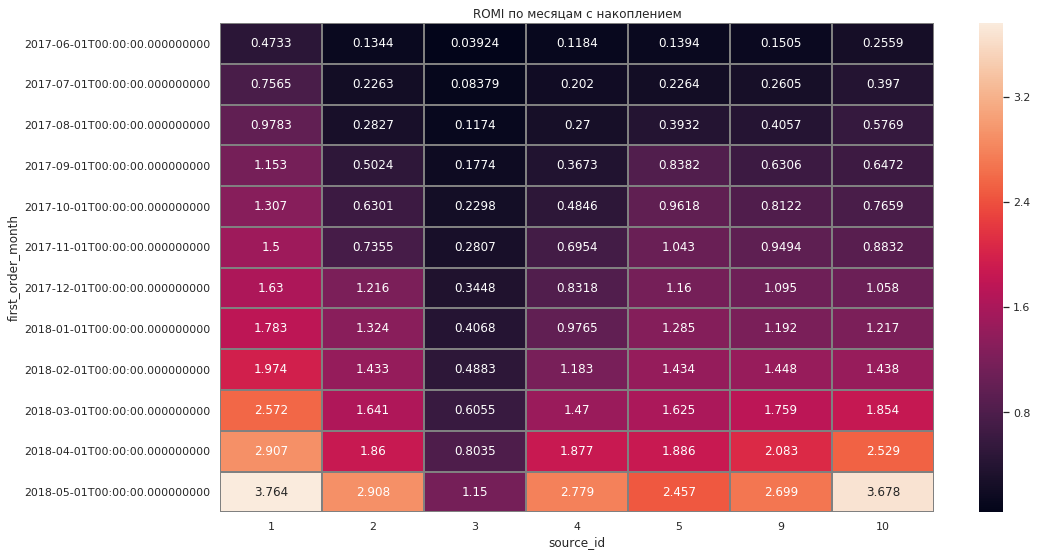

In [91]:
plt.figure(figsize=(16, 9))
plt.title('ROMI по месяцам с накоплением')
sns.heatmap(romi_pivot, annot=True, linewidths=1, fmt='.4g',linecolor='gray')

ax.set_ylabel('Месяц первой покупки')
ax.set_xlabel('Источник')
plt.show()

Рассчитаю ROI каждого источника за весь период

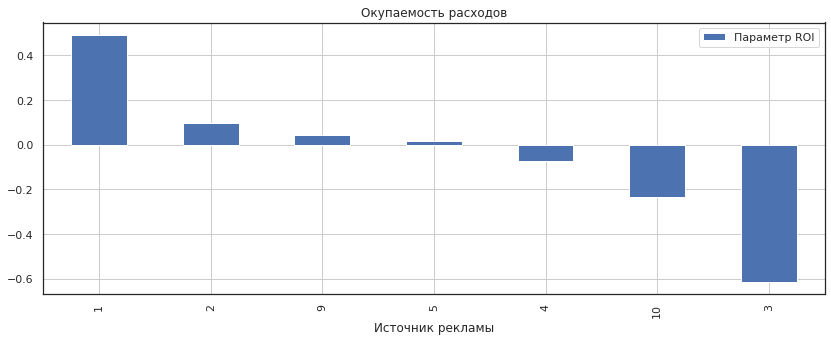

In [92]:
first_visit = visits.groupby('uid').agg({'start_ts':'min'})\
                .rename(columns={'start_ts':'first_date'})\
                .reset_index()

visits = visits.merge(first_visit, on ='uid')

visits_by_source = visits[visits['start_ts'] == visits['first_date']]

visits_by_source

costs_by_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

costs_by_source

revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})

roi = revenue_by_source.merge(costs_by_source, on = 'source_id')
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']

roi

roi = roi.sort_values(by='roi',ascending = False).set_index('source_id')

ax = (roi['roi'].plot(kind = 'bar',grid = True, figsize = (14,5)))

ax.legend(['Параметр ROI'])
ax.set_title('Окупаемость расходов')
ax.set_xlabel('Источник рекламы')
plt.show()

Расходы на маркетинг коррелируют с тем, сколько покупают за период.
Расходы на все источники, возрастают с сентября по ноябрь.
Дороже всего по стоимости привлечения покупателей обходится третий канал. Наиболее выгодным по этому показателю можно считать четвертый канал, от него пришло большее количество покупателей, а затраты на маркетинг были в два раза меньше. Также стоит отметить первый канал, у него низкая стоимость привлечения покупателей, при сравнительно небольших затратах.
Из всех когорт окупились лишь июньская (на 6 месяце жизни) и сентябрьская (на 4 месяце).
ROMI окупилось лишь по двум источникам рекламы - № 1 и 2.

## Шаг. Сформулируйте выводы и рекомендации

### Определите источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему;

Количество посетителей и покупателей с платформы desktop и touch различаются. С desktop посещают и покупают чаще примерно в 3 раза, при этом средний чек с платформы touch выше на 25%. Покупка с начала сессии проиходит в среднем через 9 минут с начала сессии. Необходимо проанализировать работу через touch и выяснить причины меньшего количества посещений и покупок с данной платформы, так как покупки с touch приносят больше прибыли (по среднему чеку).

### Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;

Количесто вернувшихся клиентов в среднем (Retention Rate) в первой когорте составляет 6,5 %. Во второй, третьей и последующих когортах Retention Rate убывает быстрее, то есть количество возвращающихся клиентов падает, особенно в зимние месяцы. Таким образом, получается что летние посетители наиболее часто возвращаются на сайт. Retention Rate c платформы touch выше по когортам, чем с платформы desktop, скорее всего это связано с тем, что с платформы touch легче зайти на сайт, так как смартфон "всегда под рукой". Необходимо увеличивать количество возвращающихся клиентов на сайт, в особенности с платформы touch.

### Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов;

Несмотря на то, что бизнес по общим расходам убыточен. В среднем затраты окупаются в 2,7 раза. Наибольшая часть прибыли приходится на лето (каникулы школьников и отпуска) и начало осени (сентябрь), а также предновогодний период.
Больше всего окупаются клиенты в июне (перед этим растут рекламные расходы на все источники в апреле), то есть окупаемость происходит за 2 месяца. Рост расходов на рекламные источники №3 и №4 в августе приносит свои плоды уже в сентябре.

Наиболее окупаемые источники №9 и №10, расходы на них приносят больше всего прибыли. Источники №1,2,3 и 4 окупаются дольше всего. Истоник №3 самый дорогой и долго окупаемый, но при этом приносит быстрый рост количества покупателей. Можно рассмотреть оптимизацию расходов на источники №1 и №2 (они долго окупаются и не приносят большого количества клиентов)